In [1]:
# Import data manipulation modules
import pandas as pd
import os
import numpy as np
import seaborn as sns

# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from bs4 import BeautifulSoup

In [2]:
draft_df = pd.read_csv('./Resources/Draft_data.csv')
draft_df.head()

,Year,Rnd,Pick,Player,Pos,DrAge,Tm,From,To,AP1,PB,St,CarAV,G,GS,College/Univ
0,2021,1,1,Trevor Lawrence\LawrTr00,QB,21.0,JAX,2021,2021,0,0,0,0,9,9,Clemson
1,2021,1,2,Zach Wilson\WilsZa00,QB,22.0,NYJ,2021,2021,0,0,0,0,6,6,BYU
2,2021,1,3,Trey Lance\LancTr00,QB,21.0,SFO,2021,2021,0,0,0,0,4,1,North Dakota St.
3,2021,1,4,Kyle Pitts\PittKy00,TE,20.0,ATL,2021,2021,0,0,0,0,10,9,Florida
4,2021,1,5,Ja'Marr Chase\ChasJa00,WR,21.0,CIN,2021,2021,0,0,0,0,9,9,LSU


In [3]:
# Determine if there are any missing values in school data
draft_df.count()

Year            5512
Rnd             5512
Pick            5512
Player          5512
Pos             5512
DrAge           5511
Tm              5512
From            5512
To              5512
AP1             5512
PB              5512
St              5512
CarAV           5512
G               5512
GS              5512
College/Univ    5503
dtype: int64

In [4]:
# determine data type for DataFrame
draft_df.dtypes

Year              int64
Rnd               int64
Pick              int64
Player           object
Pos              object
DrAge           float64
Tm               object
From              int64
To                int64
AP1               int64
PB                int64
St                int64
CarAV             int64
G                 int64
GS                int64
College/Univ     object
dtype: object

In [5]:
draft_df.head(10)

,Year,Rnd,Pick,Player,Pos,DrAge,Tm,From,To,AP1,PB,St,CarAV,G,GS,College/Univ
0,2021,1,1,Trevor Lawrence\LawrTr00,QB,21.0,JAX,2021,2021,0,0,0,0,9,9,Clemson
1,2021,1,2,Zach Wilson\WilsZa00,QB,22.0,NYJ,2021,2021,0,0,0,0,6,6,BYU
2,2021,1,3,Trey Lance\LancTr00,QB,21.0,SFO,2021,2021,0,0,0,0,4,1,North Dakota St.
3,2021,1,4,Kyle Pitts\PittKy00,TE,20.0,ATL,2021,2021,0,0,0,0,10,9,Florida
4,2021,1,5,Ja'Marr Chase\ChasJa00,WR,21.0,CIN,2021,2021,0,0,0,0,9,9,LSU
5,2021,1,6,Jaylen Waddle\WaddJa00,WR,22.0,MIA,2021,2021,0,0,0,0,10,10,Alabama
6,2021,1,7,Penei Sewell\SewePe00,OL,20.0,DET,2021,2021,0,0,0,0,9,9,Oregon
7,2021,1,8,Jaycee Horn\HornJa00,DB,21.0,CAR,2021,2021,0,0,0,0,3,3,South Carolina
8,2021,1,9,Patrick Surtain II\SurtPa01,DB,21.0,DEN,2021,2021,0,0,0,0,10,9,Alabama
9,2021,1,10,DeVonta Smith\SmitDe07,WR,22.0,PHI,2021,2021,0,0,0,0,10,10,Alabama


In [6]:
#Change Column names
draft_df.rename(columns ={ 'Rnd': 'Round',
                          'Year': 'Draft Year',
                          'Pos':'Position',
                          'DrAge':'Draft Age',
                          'Tm':'Team',
                          'From':'Start Year',
                          'To':'End Year',
                          'AP1': "First Team All-Pro",
                          'PB':'Pro-Bowl Selections',
                          'St':"Starter Years",
                          'CarAV': 'Career Approxmiate Value',
                          'G':'Games Played',
                          'GS':"Games Started" }, inplace=True)
draft_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ
0,2021,1,1,Trevor Lawrence\LawrTr00,QB,21.0,JAX,2021,2021,0,0,0,0,9,9,Clemson
1,2021,1,2,Zach Wilson\WilsZa00,QB,22.0,NYJ,2021,2021,0,0,0,0,6,6,BYU
2,2021,1,3,Trey Lance\LancTr00,QB,21.0,SFO,2021,2021,0,0,0,0,4,1,North Dakota St.
3,2021,1,4,Kyle Pitts\PittKy00,TE,20.0,ATL,2021,2021,0,0,0,0,10,9,Florida
4,2021,1,5,Ja'Marr Chase\ChasJa00,WR,21.0,CIN,2021,2021,0,0,0,0,9,9,LSU


In [7]:
#create career length column 
draft_df["Career Length (Years)"] = draft_df["End Year"] - draft_df["Start Year"]
draft_df.tail(10)

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years)
5502,2000,7,245,Danny Clark\ClarDa21,LB,23.0,JAX,2000,2010,0,0,8,39,168,102,Illinois,10
5503,2000,7,246,Leroy Fields,WR,0.0,DEN,2000,2000,0,0,0,0,0,0,Jackson St.,0
5504,2000,7,247,Mark Baniewicz,T,0.0,JAX,2000,2000,0,0,0,0,0,0,Syracuse,0
5505,2000,7,248,Lewis Kelly\KellLe21,T,23.0,MIN,2001,2005,0,0,0,4,18,5,South Carolina St.,4
5506,2000,7,249,Eugene McCaslin\McCaEu20,LB,23.0,GNB,2000,2000,0,0,0,0,1,0,Florida,0
5507,2000,7,250,Ethan Howell,WR,0.0,WAS,2000,2000,0,0,0,0,0,0,Oklahoma St.,0
5508,2000,7,251,DaShon Polk\PolkDa20,LB,23.0,BUF,2000,2006,0,0,1,10,95,16,Arizona,6
5509,2000,7,252,Rondell Mealey\MealRo00,RB,23.0,GNB,2001,2002,0,0,0,2,14,1,LSU,1
5510,2000,7,253,Alfonso Boone\BoonAl20,DT,24.0,DET,2001,2010,0,0,1,23,129,41,Mount San Antonio JC,9
5511,2000,7,254,Michael Green\GreeMi20,DB,23.0,CHI,2000,2008,0,0,2,22,104,48,Northwestern St. (LA),8


In [8]:
#Find how many positions there were in total
draft_df.Position.value_counts()

DB     798
WR     717
LB     594
DE     493
RB     454
DT     428
T      418
TE     322
G      289
QB     270
CB     189
C      138
S      128
OL      74
OLB     73
FB      48
ILB     34
DL      31
NT      14
Name: Position, dtype: int64

In [9]:
#replace and merge Positions
draft_df.loc[draft_df.Position =='NT',"Position"] = "DL"
draft_df.loc[draft_df.Position =='DE',"Position"] = "DL"
draft_df.loc[draft_df.Position =='DT',"Position"] = "DL"

In [10]:
#replace and merge Positions
draft_df.loc[draft_df.Position =='OLB',"Position"] = "LB"
draft_df.loc[draft_df.Position =='ILB',"Position"] = "LB"


In [11]:
#replace and merge Positions
draft_df.loc[draft_df.Position =='T',"Position"] = "OL"
draft_df.loc[draft_df.Position =='C',"Position"] = "OL"
draft_df.loc[draft_df.Position =='G',"Position"] = "OL"

In [12]:
draft_df.loc[draft_df.Position =='S',"Position"] = "DB"
draft_df.loc[draft_df.Position =='CB',"Position"] = "DB"

In [13]:
draft_df.Position.value_counts()

DB    1115
DL     966
OL     919
WR     717
LB     701
RB     454
TE     322
QB     270
FB      48
Name: Position, dtype: int64

In [14]:
# get data for drafts from 2000 to 2010
#draft_df_2010 = draft_df.loc[draft_df.Draft_Yr <= 2010, :]

In [15]:
#Columns for Viz 
draft_df['first team'] = np.where(draft_df['First Team All-Pro'] >= 1, True, False)
draft_df['PB'] = np.where(draft_df['Pro-Bowl Selections'] >= 1, True, False)


In [16]:
# Export to new CSV
draft_df.to_csv('Draft_Viz.csv')

# 80th Overall pick DF

In [17]:
pick80_df = draft_df.loc[draft_df['Pick'].isin([80])]

pick80_df.head(20)

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
79,2021,3,80,Divine Deablo\DeabDi00,DB,23.0,LVR,2021,2021,0,0,0,0,9,0,Virginia Tech,0,False,False
334,2020,3,80,Lynn Bowden Jr.\BowdLy00,WR,22.0,LVR,2020,2020,0,0,0,2,10,4,Kentucky,0,False,False
583,2019,3,80,Sione Takitaki\TakiSi00,LB,24.0,CLE,2019,2021,0,0,1,8,39,18,BYU,2,False,False
832,2018,3,80,Martinas Rankin\RankMa00,OL,23.0,HOU,2018,2020,0,0,0,7,23,10,Mississippi St.,2,False,False
1081,2017,3,80,Tarell Basham\BashTa00,DL,23.0,IND,2017,2021,0,0,1,10,67,18,Ohio,4,False,False
1329,2016,3,80,Adolphus Washington\WashAd00,DL,21.0,BUF,2016,2018,0,0,2,9,35,21,Ohio St.,2,False,False
1578,2015,3,80,Alex Carter\CartAl01,DB,20.0,DET,2016,2018,0,0,0,0,2,0,Stanford,2,False,False
1832,2014,3,80,Dexter McDougle\McDoDe00,DB,23.0,NYJ,2015,2018,0,0,0,2,31,1,Maryland,3,False,False
2085,2013,3,80,J.J. Wilcox\WilcJ.00,DB,22.0,DAL,2013,2018,0,0,2,16,77,39,Georgia Southern,5,False,False
2334,2012,3,80,Jamell Fleming\FlemJa00,DB,23.0,ARI,2012,2015,0,0,0,5,46,7,Oklahoma,3,False,False


# Positional Dataframes

In [18]:
#QB data frame
QB_df = draft_df[draft_df["Position"] == "QB"]
QB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
0,2021,1,1,Trevor Lawrence\LawrTr00,QB,21.0,JAX,2021,2021,0,0,0,0,9,9,Clemson,0,False,False
1,2021,1,2,Zach Wilson\WilsZa00,QB,22.0,NYJ,2021,2021,0,0,0,0,6,6,BYU,0,False,False
2,2021,1,3,Trey Lance\LancTr00,QB,21.0,SFO,2021,2021,0,0,0,0,4,1,North Dakota St.,0,False,False
10,2021,1,11,Justin Fields\FielJu00,QB,22.0,CHI,2021,2021,0,0,0,0,9,7,Ohio St.,0,False,False
14,2021,1,15,Mac Jones\JoneMa05,QB,23.0,NWE,2021,2021,0,0,1,0,11,11,Alabama,0,False,False


In [19]:
#RB DataFrame
RB_df = draft_df[draft_df["Position"] == "RB"]
RB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
23,2021,1,24,Najee Harris\HarrNa00,RB,23.0,PIT,2021,2021,0,0,0,0,9,9,Alabama,0,False,False
24,2021,1,25,Travis Etienne\EtieTr00,RB,22.0,JAX,2021,2021,0,0,0,0,0,0,Clemson,0,False,False
34,2021,2,35,Javonte Williams\WillJa10,RB,21.0,DEN,2021,2021,0,0,0,0,10,0,North Carolina,0,False,False
87,2021,3,88,Trey Sermon\SermTr00,RB,22.0,SFO,2021,2021,0,0,0,0,7,2,Ohio St.,0,False,False
106,2021,4,107,Michael Carter\CartMi03,RB,22.0,NYJ,2021,2021,0,0,0,0,9,6,North Carolina,0,False,False


In [20]:
#FB dataframe
FB_df = draft_df[draft_df["Position"] == "FB"]
FB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
182,2021,5,184,Ben Mason\MasoBe00,FB,22.0,BAL,2021,2021,0,0,0,0,0,0,Michigan,0,False,False
1192,2017,6,192,Alex Armah\ArmaAl00,FB,23.0,CAR,2017,2021,0,0,0,0,65,6,West Georgia,4,False,False
1206,2017,6,206,Sam Rogers\RogeSa00,FB,22.0,LAR,2017,2017,0,0,0,0,0,0,Virginia Tech,0,False,False
1237,2017,7,240,Marquez Williams\WillMa09,FB,23.0,JAX,2017,2017,0,0,0,0,1,0,Miami (FL),0,False,False
1425,2016,6,176,Andy Janovich\JanoAn00,FB,23.0,DEN,2016,2021,0,0,1,2,71,24,Nebraska,5,False,False


In [21]:
#WR Dataframe
WR_df = draft_df[draft_df["Position"] == "WR"]
WR_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
4,2021,1,5,Ja'Marr Chase\ChasJa00,WR,21.0,CIN,2021,2021,0,0,0,0,9,9,LSU,0,False,False
5,2021,1,6,Jaylen Waddle\WaddJa00,WR,22.0,MIA,2021,2021,0,0,0,0,10,10,Alabama,0,False,False
9,2021,1,10,DeVonta Smith\SmitDe07,WR,22.0,PHI,2021,2021,0,0,0,0,10,10,Alabama,0,False,False
19,2021,1,20,Kadarius Toney\ToneKa00,WR,22.0,NYG,2021,2021,0,0,0,0,8,3,Florida,0,False,False
26,2021,1,27,Rashod Bateman\BateRa00,WR,21.0,BAL,2021,2021,0,0,0,0,4,1,Minnesota,0,False,False


In [22]:
#TE Dataframe
TE_df = draft_df[draft_df["Position"] == "TE"]
TE_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
3,2021,1,4,Kyle Pitts\PittKy00,TE,20.0,ATL,2021,2021,0,0,0,0,10,9,Florida,0,False,False
54,2021,2,55,Pat Freiermuth\FreiPa00,TE,22.0,PIT,2021,2021,0,0,0,0,9,5,Penn St.,0,False,False
80,2021,3,81,Hunter Long\LongHu00,TE,23.0,MIA,2021,2021,0,0,0,0,3,1,Boston Col.,0,False,False
82,2021,3,83,Tommy Tremble\TremTo00,TE,21.0,CAR,2021,2021,0,0,0,0,10,8,Notre Dame,0,False,False
96,2021,3,97,Tre' McKitty\McKiTr00,TE,22.0,LAC,2021,2021,0,0,0,0,3,1,Georgia,0,False,False


In [23]:
#OL Dataframe
OL_df = draft_df[draft_df["Position"] == "OL"]
OL_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
6,2021,1,7,Penei Sewell\SewePe00,OL,20.0,DET,2021,2021,0,0,0,0,9,9,Oregon,0,False,False
12,2021,1,13,Rashawn Slater\SlatRa00,OL,22.0,LAC,2021,2021,0,0,0,0,9,9,Northwestern,0,False,False
13,2021,1,14,Alijah Vera-Tucker\VeraAl00,OL,22.0,NYJ,2021,2021,0,0,0,0,9,9,USC,0,False,False
16,2021,1,17,Alex Leatherwood\LeatAl00,OL,22.0,LVR,2021,2021,0,0,0,0,9,9,Alabama,0,False,False
22,2021,1,23,Christian Darrisaw\DarrCh00,OL,22.0,MIN,2021,2021,0,0,0,0,6,4,Virginia Tech,0,False,False


In [24]:
#DL Dataframe
DL_df = draft_df[draft_df["Position"] == "DL"]
DL_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
17,2021,1,18,Jaelan Phillips\PhilJa02,DL,22.0,MIA,2021,2021,0,0,0,0,10,4,Miami (FL),0,False,False
20,2021,1,21,Kwity Paye\PayeKw00,DL,22.0,IND,2021,2021,0,0,0,0,8,8,Michigan,0,False,False
27,2021,1,28,Payton Turner\TurnPa02,DL,23.0,NOR,2021,2021,0,0,0,0,5,0,Houston,0,False,False
29,2021,1,30,Gregory Rousseau\RousGr00,DL,21.0,BUF,2021,2021,0,0,0,0,9,9,Miami (FL),0,False,False
30,2021,1,31,Odafe Oweh\OwehJa00,DL,22.0,BAL,2021,2021,0,0,0,0,9,1,Penn St.,0,False,False


In [25]:
#DB Dataframe
DB_df = draft_df[draft_df["Position"] == "DB"]
DB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
7,2021,1,8,Jaycee Horn\HornJa00,DB,21.0,CAR,2021,2021,0,0,0,0,3,3,South Carolina,0,False,False
8,2021,1,9,Patrick Surtain II\SurtPa01,DB,21.0,DEN,2021,2021,0,0,0,0,10,9,Alabama,0,False,False
21,2021,1,22,Caleb Farley\FarlCa00,DB,22.0,TEN,2021,2021,0,0,0,0,3,1,Virginia Tech,0,False,False
25,2021,1,26,Greg Newsome II\NewsGr00,DB,21.0,CLE,2021,2021,0,0,0,0,8,7,Northwestern,0,False,False
28,2021,1,29,Eric Stokes\StokEr00,DB,22.0,GNB,2021,2021,0,0,0,0,9,7,Georgia,0,False,False


In [26]:
#CB dataframe
CB_df = draft_df[draft_df["Position"] == "CB"]
CB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB


In [27]:
#LB dataframe
LB_df = draft_df[draft_df["Position"] == "LB"]
LB_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
11,2021,1,12,Micah Parsons\ParsMi00,LB,22.0,DAL,2021,2021,0,0,0,0,9,9,Penn St.,0,False,False
15,2021,1,16,Zaven Collins\CollZa00,LB,22.0,ARI,2021,2021,0,0,0,0,10,5,Tulsa,0,False,False
18,2021,1,19,Jamin Davis\DaviJa11,LB,22.0,WAS,2021,2021,0,0,0,0,9,4,Kentucky,0,False,False
31,2021,1,32,Joe Tryon-Shoyinka\TryoJo00,LB,22.0,TAM,2021,2021,0,0,0,0,9,3,Washington,0,False,False
49,2021,2,50,Azeez Ojulari\OjulAz00,LB,21.0,NYG,2021,2021,0,0,0,0,9,6,Georgia,0,False,False


In [28]:
#S dataframe
S_df = draft_df[draft_df["Position"] == "S"]
S_df.head()

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB


# Graphs and Plots

In [29]:
# set some plotting styles
from matplotlib import rcParams

# set the font scaling and the plot sizes
sns.set(font_scale=1.65)
rcParams["figure.figsize"] = 12,9

In [30]:
# Use distplot to view the distribu
#sns.distplot(draft_df)
#plt.title("Distribution of Career Approximate Value")
#plt.xlim(-5,150)
#plt.show()

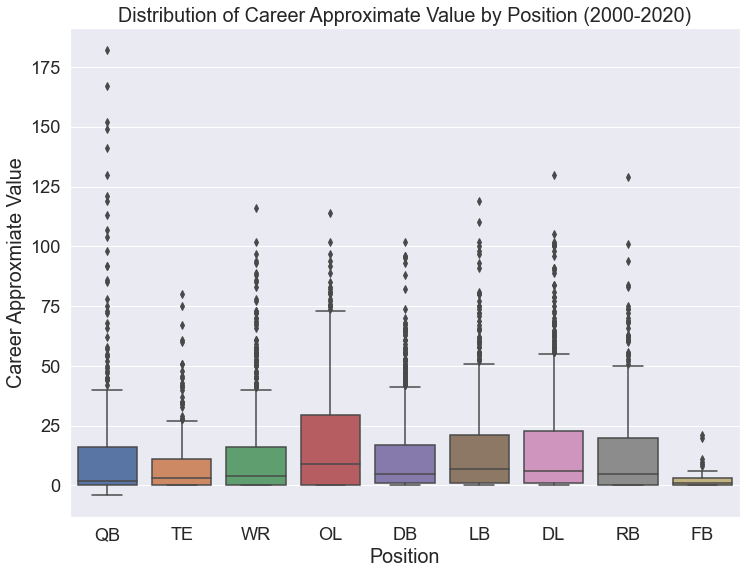

In [31]:
sns.boxplot(x="Position", y="Career Approxmiate Value", data=draft_df)
plt.title("Distribution of Career Approximate Value by Position (2000-2020)")
plt.show()

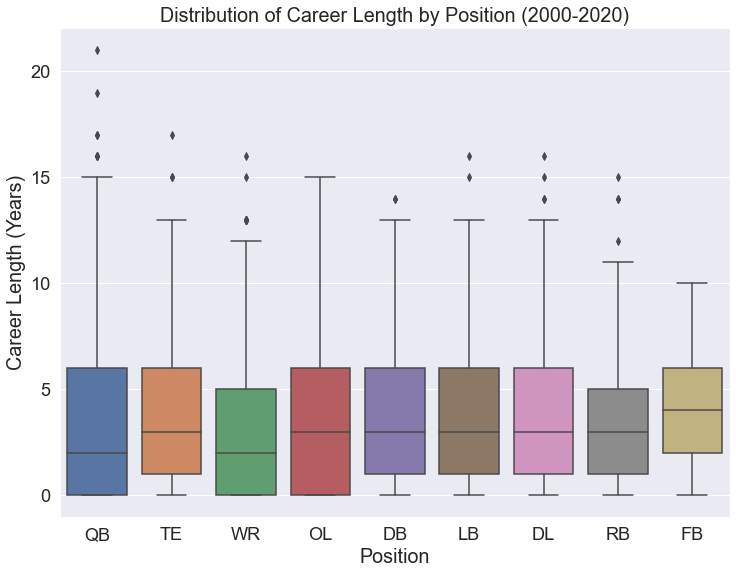

In [32]:
sns.boxplot(x="Position", y="Career Length (Years)", data=draft_df)
plt.title("Distribution of Career Length by Position (2000-2020)")
plt.show()

In [33]:
round_info = pd.crosstab(index = draft_df["Position"], columns=draft_df["Round"], margins=True)
round_info / round_info.loc['All']

Round,1,2,3,4,5,6,7,All
Position,,,,,,,,
DB,0.177396,0.229555,0.204633,0.206725,0.222367,0.203125,0.177540,0.202286
DL,0.223176,0.163558,0.180180,0.164384,0.154746,0.159856,0.183957,0.175254
FB,0.000000,0.000000,0.005148,0.012453,0.013004,0.014423,0.012834,0.008708
LB,0.105866,0.137733,0.141570,0.125778,0.145644,0.116587,0.118717,0.127177
OL,0.165951,0.163558,0.162162,0.170610,0.159948,0.173077,0.170053,0.166727
QB,0.092990,0.032999,0.036036,0.038605,0.045514,0.056490,0.043850,0.048984
RB,0.072961,0.077475,0.072072,0.103362,0.067620,0.087740,0.090909,0.082366
TE,0.035765,0.051650,0.068211,0.058531,0.070221,0.055288,0.065241,0.058418
WR,0.125894,0.143472,0.129987,0.119552,0.120936,0.133413,0.136898,0.130080


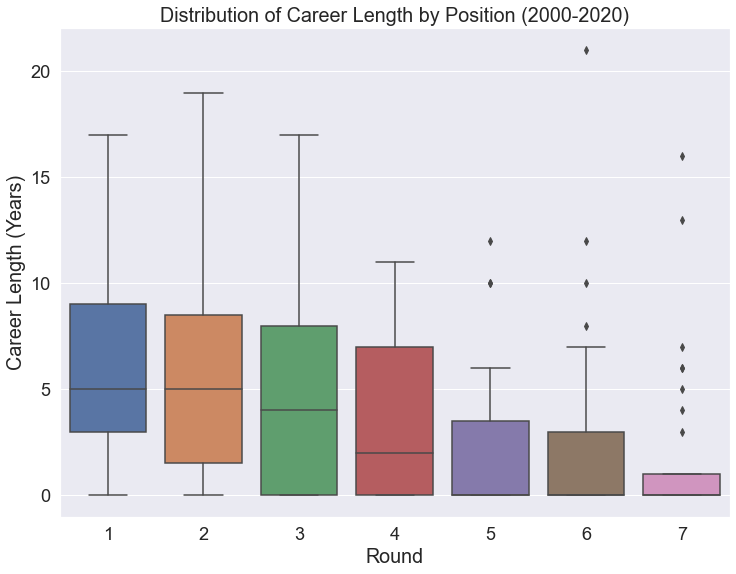

In [34]:
#QB data 
sns.boxplot(x="Round", y="Career Length (Years)", data=QB_df)
plt.title("Distribution of Career Length by Position (2000-2020)")
plt.show()

In [35]:
QB_df.describe(include='all')

,Draft Year,Round,Pick,Player,Position,Draft Age,Team,Start Year,End Year,First Team All-Pro,Pro-Bowl Selections,Starter Years,Career Approxmiate Value,Games Played,Games Started,College/Univ,Career Length (Years),first team,PB
count,270.000000,270.000000,270.000000,270,270,270.000000,270,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270,270.000000,270,270
unique,NaN,NaN,NaN,270,1,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,2,2
top,NaN,NaN,NaN,Zac Robinson\RobiZa00,QB,NaN,NYJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSU,NaN,False,False
freq,NaN,NaN,NaN,1,270,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,263,231
mean,2010.137037,3.937037,117.381481,NaN,NaN,21.122222,NaN,2010.400000,2014.162963,0.040741,0.451852,1.714815,16.988889,34.807407,28.292593,NaN,3.762963,NaN,NaN
std,6.345660,2.194899,81.408550,NaN,NaN,6.064390,NaN,6.391444,6.316565,0.289544,1.621044,3.345663,31.934352,52.922894,51.222159,NaN,4.481614,NaN,NaN
min,2000.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,2000.000000,2000.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,2004.250000,2.000000,36.000000,NaN,NaN,22.000000,NaN,2005.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,NaN
50%,2010.000000,4.000000,118.500000,NaN,NaN,23.000000,NaN,2010.000000,2015.000000,0.000000,0.000000,0.000000,2.000000,13.000000,7.000000,NaN,2.000000,NaN,NaN
75%,2016.000000,6.000000,191.750000,NaN,NaN,23.000000,NaN,2016.000000,2020.000000,0.000000,0.000000,2.000000,16.000000,49.000000,33.000000,NaN,6.000000,NaN,NaN


In [36]:
QB_df.groupby("Round").describe(include = "all")

Draft Year                                                         \
           count unique top freq         mean       std     min     25%   
Round                                                                     
1           65.0    NaN NaN  NaN  2011.584615  6.436935  2000.0  2006.0   
2           23.0    NaN NaN  NaN  2010.391304  5.805476  2001.0  2007.0   
3           28.0    NaN NaN  NaN  2010.250000  6.501424  2000.0  2005.0   
4           31.0    NaN NaN  NaN  2011.129032  6.566287  2001.0  2005.0   
5           35.0    NaN NaN  NaN  2008.800000  5.794521  2000.0  2004.5   
6           47.0    NaN NaN  NaN  2009.063830  6.438351  2000.0  2003.5   
7           41.0    NaN NaN  NaN  2009.243902  6.398361  2000.0  2004.0   

                       ...     PB                                            \
          50%     75%  ... unique    top freq mean  std  min  25%  50%  75%   
Round                  ...                                                    
1      2012.0  2018.0  ...      2  False   40  NaN  NaN  NaN  NaN  NaN  NaN   
2      2010.0  2014.0  ...      2  False   20  NaN  NaN  NaN  NaN  NaN  NaN   
3      2010.5  2016.0  ...      2  False   25  NaN  NaN  NaN  NaN  NaN  NaN   
4      2013.0  2016.0  ...      2  False   28  NaN  NaN  NaN  NaN  NaN  NaN   
5      2008.0  2012.5  ...      1  False   35  NaN  NaN  NaN  NaN  NaN  NaN   
6      2009.0  2014.0  ...      2  False   43  NaN  NaN  NaN  NaN  NaN  NaN   
7      2008.0  2013.0  ...      2  False   40  NaN  NaN  NaN  NaN  NaN  NaN   

            
       max  
Round       
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  

[7 rows x 198 columns]

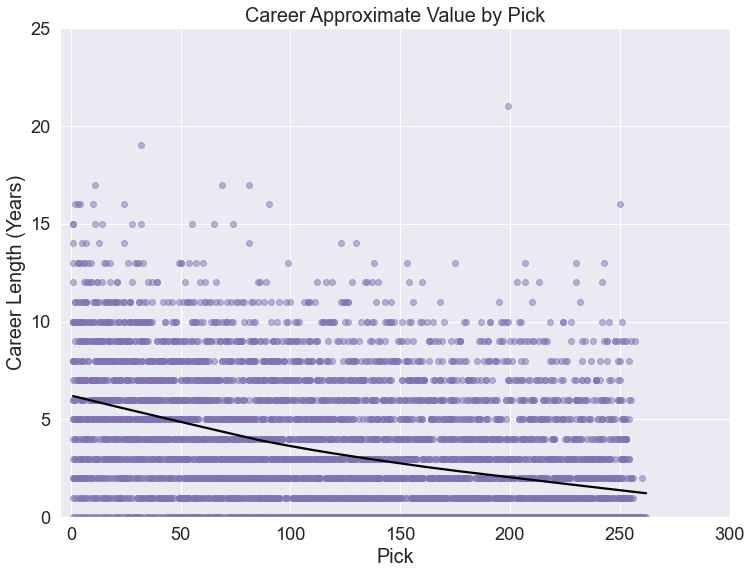

In [37]:
# plot LOWESS curve
# set line color to be black, and scatter color to cyan
sns.regplot(x="Pick", y="Career Length (Years)", data=draft_df, lowess=True,
            line_kws={"color": "black"},
            scatter_kws={"color": sns.color_palette()[4], "alpha": 0.5})
plt.title("Career Approximate Value by Pick")
plt.xlim(-5, 300)
plt.ylim(0, 25)
plt.show()

C:\Users\User\anaconda3\envs\PythonData\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


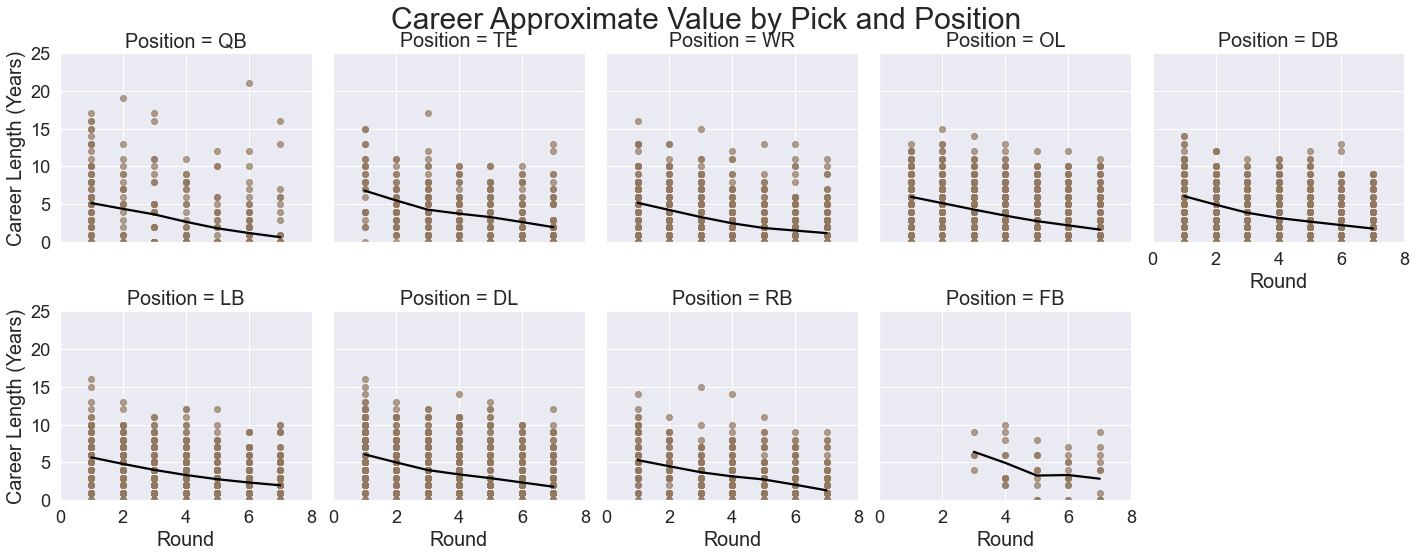

In [38]:
lm = sns.lmplot(x="Round", y="Career Length (Years)", data=draft_df, lowess=True, col="Position",
                col_wrap=5, size=4, line_kws={"color": "black"},
                scatter_kws={"color": sns.color_palette()[5], "alpha": 0.7})

# add title to the plot (which is a FacetGrid)
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
plt.subplots_adjust(top=0.9)
lm.fig.suptitle("Career Approximate Value by Pick and Position",
                fontsize=30)

plt.xlim(0, 8)
plt.ylim(0, 25)
plt.show()

# QB Summary